In [1]:
"""
Created on 2019/3/4

@author: Tzu-Hsuan Cheng 
ID: r07741023

Homework 1 

"""

'\nCreated on 2019/3/4\n\n@author: Tzu-Hsuan Cheng \nID: r07741023\n\nHomework 1 \n\n'

## 第一題 [myknn_regressor]

Q1.1 Create your myknn_regressor.

In [3]:
import pickle
import numpy as np

#import the data
data = pickle.load(open( "msd_data1.pickle", "rb" ) )
X_train = data['X_train']
y_train = data['Y_train']
X_test = data['X_test']
y_test = data['Y_test']

In [2]:
class myKnn():
    
    def __init__(self, k, remove_outliers):
        self.k = k
        self.remove_outliers = remove_outliers
        return
    
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        return
    
    def predict(self, X_test):
        # loop over all observations
        predictions = []
        for i in range(len(X_test)):
            predictions.append(self.pre_predict(X_test[i, :]))
            
        return predictions
    
    def getOutliers(self, y):
        q1 = np.percentile(y, 25)  #四分位數的算法
        q3 = np.percentile(y, 75)
        iqr = q3-q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
                
        y_temp = []
        for i,v in enumerate(y):
            if (v >= lower) and (v <= upper):
                y_temp.append(v)
        
        return y_temp


    def pre_predict(self, X_test):
        # create list for distances and targets
        distances = []
        targets = []
        total = 0

        for i in range(len(self.X_train)):
            # euclidean distance
            distance = np.sqrt(np.sum(np.square(X_test - self.X_train[i, :])))
            # add it to list of distances
            distances.append([distance, i])
            distances = sorted(distances)

        # make a list of the k neighbors' targets
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.Y_train[index])
        
        # check the outliers
        if (self.k >= 10) and (self.remove_outliers == True):
            y_temp = self.getOutliers(targets)
            k_temp = len(y_temp)
            
        else: 
            k_temp = self.k
            y_temp = targets
                    
        
        # calculate the equal_weight   
        for i in range(k_temp):
            total = total + y_temp[i] 
                
        predicts = total/k_temp
        return predicts

Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  k=20  and "equal_weight"  f . List the RMSE and the first 20 predictions in the testing data.

In [8]:
#standardized all features
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)


#run
myknn = myKnn(k=20, remove_outliers=False)
myknn.fit(x_train, y_train)
ypred = myknn.predict(x_test)

In [13]:
#RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

RMSE = rmse(ypred, y_test)

10.292158827638316

In [32]:
# Answer
import pandas as pd
df = pd.DataFrame({"The first 20 predictions":ypred[0:20]})
print("RMSE:", RMSE)
print(df)

RMSE: 10.225720983625129
    The first 20 predictions
0                1992.900000
1                1994.050000
2                2000.050000
3                1992.736842
4                1992.800000
5                2000.000000
6                1987.100000
7                1990.900000
8                2001.800000
9                2003.947368
10               2001.150000
11               2000.944444
12               1995.550000
13               1997.200000
14               1998.611111
15               1997.350000
16               1992.150000
17               2004.235294
18               2003.600000
19               1995.750000


Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  k=20  and "remove_outier"  f . List the RMSE and the first 20 predictions in the testing data.


In [ ]:
#run
myknn = myKnn(k=20, remove_outliers=True)
myknn.fit(x_train, y_train)
ypred = myknn.predict(x_test)

In [3]:
#RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [33]:
# Answer
RMSE = rmse(ypred, y_test)
df = pd.DataFrame({"The first 20 predictions":ypred[0:20]})
print("RMSE:", RMSE)
print(df)

RMSE: 10.225720983625129
    The first 20 predictions
0                1992.900000
1                1994.050000
2                2000.050000
3                1992.736842
4                1992.800000
5                2000.000000
6                1987.100000
7                1990.900000
8                2001.800000
9                2003.947368
10               2001.150000
11               2000.944444
12               1995.550000
13               1997.200000
14               1998.611111
15               1997.350000
16               1992.150000
17               2004.235294
18               2003.600000
19               1995.750000


## 第二題 Tuning the Hyper-parameter

In [11]:
#case1
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#standardize
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
RMSE_1 = []
for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(x_train, y_train)  
    y_pred = classifier.predict(x_test) 
    RMSE_1.append(rmse(y_pred, y_test))

In [12]:
RMSE_1 

[13.94019368588543,
 15.495268094916375,
 17.082125160529646,
 18.003277479392466,
 18.30347872218102,
 14.972675111682616,
 13.36068860500835,
 12.92319619908326,
 12.589691550365059,
 12.425189468709656,
 12.342109490142544,
 12.24143237806208,
 12.27539544508988,
 12.345228497952828,
 12.428529009232482,
 12.410479442793498,
 12.589691550365059,
 12.752725198952575,
 12.86747838544911,
 12.947728243466754,
 13.038200284804136,
 13.118561913055359,
 13.204898081141458]

In [13]:
#case2

#import the data again
data = pickle.load(open( "msd_data1.pickle", "rb" ) )
X_train = data['X_train']
y_train = data['Y_train']
X_test = data['X_test']
y_test = data['Y_test']

k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
RMSE_2 = []
for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test) 
    RMSE_2.append(rmse(y_pred, y_test))


In [14]:
RMSE_2 

[14.923638966418345,
 16.527219971913002,
 17.958025132699493,
 18.922209173349714,
 19.2830149786455,
 15.532492824184189,
 13.574596372145534,
 13.365228517811932,
 13.05419472813241,
 12.818775292515271,
 12.52252636917434,
 12.618953997855765,
 12.639356523705363,
 12.519278466961797,
 12.599576712466707,
 12.60072749222573,
 12.871764965743173,
 13.047745654582123,
 13.095648132108622,
 13.170143000995344,
 13.196754651554803,
 13.26514229098203,
 13.213793298418638]

In [ ]:
#case 3

#standardize
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

RMSE_3 = []
k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

for i in k:
    print(i)
    myknn = myKnn(k=i, remove_outliers=True)
    myknn.fit(x_train, y_train)
    ypred = myknn.predict(x_test)
    RMSE_3.append(rmse(ypred, y_test))
    print(RMSE_3)

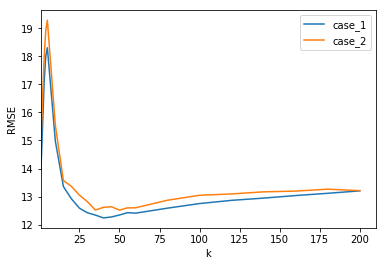

In [21]:
# plot the curves of 3 cases
import matplotlib.pyplot as plt

plt.plot(k, RMSE_1)
plt.plot(k, RMSE_2)
#plt.plot(k, RMSE_3) # 結果跑不出來

plt.ylabel('RMSE')
plt.xlabel('k')
plt.xlim(1,)

plt.legend(['case_1', 'case_2'], loc='upper right') #case 3


My observations:
1. 從k=20 myKnn 與 套件的模型，雖然目前自己的模型結果還沒跑出來，但可以猜測其表現應該是最好的
因為有加入移除outliers這個限制
2. 但也因此自己的模型跑的時間比起套件慢很多，改善空間很大
3. 比較case1 與case2可以明顯看出有標準化的結果比較好